<a href="https://colab.research.google.com/github/palubad/SAR-based-VIs/blob/main/Analysis/Run_the_trained_ML_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Use the trained Machine Learning (ML) models from Paluba et al. (2025)

**Author**: Daniel Paluba, EO4Landscape research group, Charles University, Prague, Czechia <br><br>

This notebook compares classical machine learning (Random Forest with hyperparameter tuning) and Automatic Machine Learning (auto-sklearn) for predicting optical vegetation indices of forests using Sentinel-1 SAR data and Sentinel-2 optical data.  

The analysis includes:
1. Data preprocessing: Cleaning and preparing the input data.
2. Model training and evaluation: Implementing and assessing the performance of Random Forest and AutoML models.
3. Visualization: Generating scatterplots and time series comparisons to illustrate the model predictions.

The data used in this notebook represent **time series of temporally and spatially** aligned multispectral optical **Sentinel-2** data, SAR **Sentinel-1** data, with other ancillary data, such as meteorological data from **ERA5-Land** data and DEM-based data from **Copernicus DEM**. <br><br>
They are prepared and preprocessed in Google Earth Engine (GEE) using the [**MMTS-GEE tool**](https://github.com/palubad/MMTS-GEE). Feel free to generate your own time series, see the GitHub documentation or in the [corresponding research paper](https://doi.org/10.14712/23361980.2024.18).
<br><br>

If you use the models or the codes, please **refer to the corresponding articles**: <br>
*   Paluba, D., Le Saux, B., Sarti, F., Štych, P. (2025): Estimating vegetation indices and biophysical parameters for Central European temperate forests with Sentinel-1 SAR data and machine learning. Big Earth Data. DOI: https://doi.org/10.1080/20964471.2025.2459300
*   Paluba, D., Le Saux, B., Sarti, F., Štych, P. (2024): Identification of Optimal Sentinel-1 SAR Polarimetric Parameters for Forest Monitoring in Czechia. AUC Geographica 59(2), 1–15, DOI: https://doi.org/10.14712/23361980.2024.18.
<br>

**License:** CC-BY-4.0


---



**Contacts**: <br>
email: palubad@natur.cuni.cz <br>
LinkedIn: https://www.linkedin.com/in/daniel-paluba/







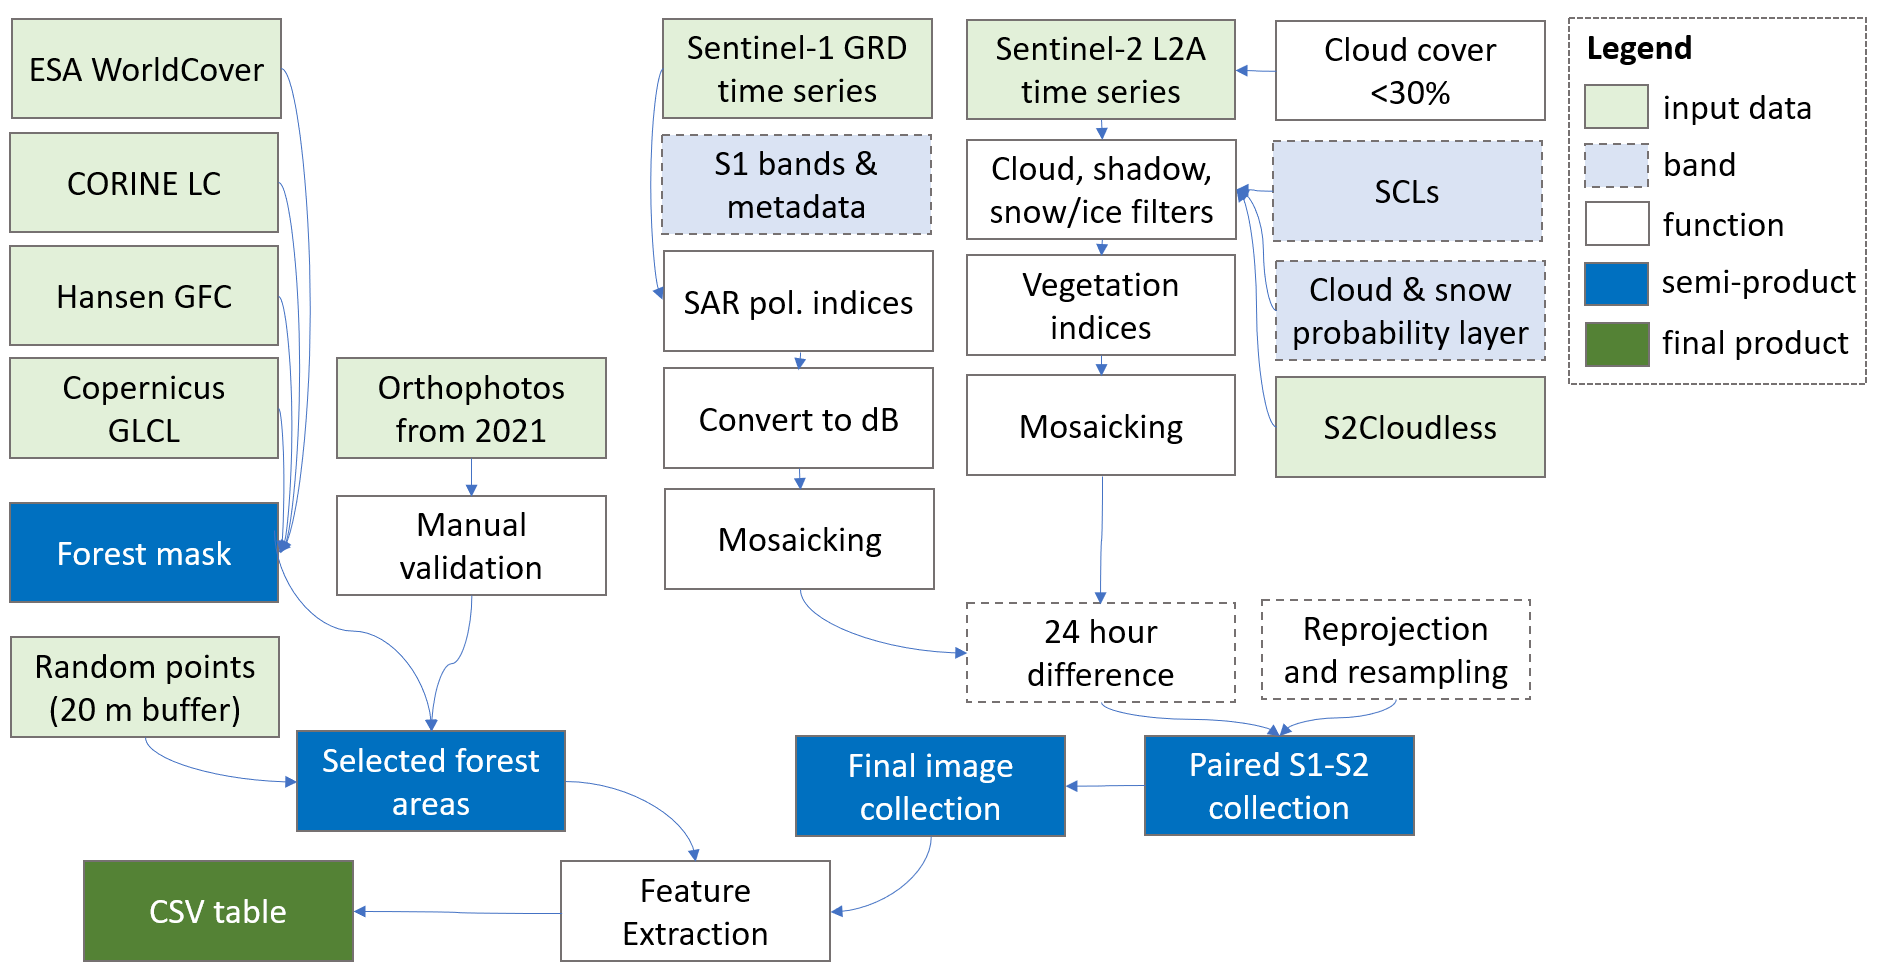
Figure 1. Data preprocessing using the [MMTS-GEE tool](https://github.com/palubad/MMTS-GEE) in Google Earth Engine.

## Define helper functions to make our lives easier
... to avoid repetitions code blocks

In [116]:
# Define a function to predict the estimated optical vegetation indices and plot it with the original Sentinel-2 data
def predict_plot_S1_S2 (model, VI, data, training_features, S1_deciduous, S2_deciduous, S1_coniferous, S2_coniferous, S1_loss1, S2_loss1, S1_loss3, S2_loss3,moving_window_size):
    '''
    The predict_plot_S1_S2 function takes a pre-trained model along with Sentinel-1 and Sentinel-2 data for different forest areas as
    input parameters. It predicts the vegetation indices using the model and plots the predicted values alongside the original values.
    This function provides a visual comparison between the predicted and original vegetation indices, allowing for visual analysis of
    the model's performance across deciduous and coniferous forests as well as areas where forest loss occurred.

    Parameters:
    model: The pre-trained model used for prediction.
    training_features: A list of features used for prediction. Must be the same as features used for training of the model.
    S1_deciduous, S2_deciduous: Data sets representing deciduous forest areas with Sentinel-1 and Sentinel-2 data.
    S1_coniferous, S2_coniferous: Data sets representing the coniferous forest area with Sentinel-1 and Sentinel-2 data.
    S1_loss1, S2_loss1: Data sets representing areas where forest loss occurred with Sentinel-1 and Sentinel-2 data.
    moving_window_size: size of the average moving window to apply for the S1 time series. [Use 1 if you do not want to apply a moving window]
    '''
    # Predict for deciduous forest area
    predicted_deciduous = model.predict(S1_deciduous[training_features])
    withPredictions_deciduous = S1_deciduous.copy()
    withPredictions_deciduous['predicted'] = predicted_deciduous

    # Predict for coniferous forest area
    predicted_coniferous = model.predict(S1_coniferous[training_features])
    withPredictions_coniferous = S1_coniferous.copy()
    withPredictions_coniferous['predicted'] = predicted_coniferous

    # Predict for area where a forest loss occurred
    predicted_loss1 = model.predict(S1_loss1[training_features])
    withPredictions_loss1 = S1_loss1.copy()
    withPredictions_loss1['predicted'] = predicted_loss1

    # Predict for area where a forest loss occurred (2)
    predicted_loss3 = model.predict(S1_loss3[training_features])
    withPredictions_loss3 = S1_loss3.copy()
    withPredictions_loss3['predicted'] = predicted_loss3

    # Set the marker size for data points
    marker_size = 3

    # Set the linewidth for the time series
    line_width = 0.6

    # Create a 2x2 subplot grid
    fig, axs = plt.subplots(2, 2,figsize=(12, 12))

    # Plot for deciduous forest area
    axs[0, 0].plot(withPredictions_deciduous["DOY"], withPredictions_deciduous["predicted"].rolling(window=moving_window_size).mean(), 'o-', markersize=marker_size, linewidth=line_width, color='blue', label='Predicted '+VI)
    axs[0, 0].plot(S2_deciduous["DOY"], S2_deciduous[VI], 'o-', markersize=marker_size, linewidth=line_width, color='red', label='Original  '+VI)
    axs[0, 0].set_xlabel("Day of the year (DOY)")
    axs[0, 0].set_ylabel("Original / predicted "+VI)
    axs[0, 0].set_title('Original vs predicted ' + VI + ' (deciduous forests)')
    axs[0, 0].legend()
    axs[0, 0].set_xlim([0, 365])
    # axs[0, 0].set_ylim([0.2, 0.95])

    # Plot for coniferous forest area
    axs[0, 1].plot(withPredictions_coniferous["DOY"], withPredictions_coniferous["predicted"].rolling(window=moving_window_size).mean(), 'o-', markersize=marker_size, linewidth=line_width, color='blue', label='Predicted '+VI)
    axs[0, 1].plot(S2_coniferous["DOY"], S2_coniferous[VI], 'o-', markersize=marker_size, linewidth=line_width, color='red', label='Original  '+VI)
    axs[0, 1].set_xlabel("Day of the year (DOY)")
    axs[0, 1].set_ylabel("Original / predicted "+VI)
    axs[0, 1].set_title('Original vs predicted ' + VI + ' (coniferous forests)')
    axs[0, 1].legend()
    axs[0, 1].set_xlim([0, 365])
    # axs[0, 1].set_ylim([0.2, 0.95])

    # Plot for forest loss (1)
    axs[1, 0].plot(withPredictions_loss1["DOY"], withPredictions_loss1["predicted"].rolling(window=moving_window_size).mean(), 'o-', markersize=marker_size, linewidth=line_width, color='blue', label='Predicted '+VI)
    axs[1, 0].plot(S2_loss1["DOY"], S2_loss1[VI], 'o-', markersize=marker_size, linewidth=line_width, color='red', label='Original  '+VI)
    axs[1, 0].set_xlabel("Day of the year (DOY)")
    axs[1, 0].set_ylabel("Original / predicted "+VI)
    axs[1, 0].set_title('Original vs predicted ' + VI + ' for a forest loss (coniferous forests)')
    axs[1, 0].legend()
    axs[1, 0].set_xlim([0, 365])
    # axs[1, 0].set_ylim([0.2, 0.95])

    # Plot for forest loss (2)
    axs[1, 1].plot(withPredictions_loss3["DOY"], withPredictions_loss3["predicted"].rolling(window=moving_window_size).mean(), 'o-', markersize=marker_size, linewidth=line_width, color='blue', label='Predicted '+VI)
    axs[1, 1].plot(S2_loss3["DOY"], S2_loss3[VI], 'o-', markersize=marker_size, linewidth=line_width, color='red', label='Original  '+VI)
    axs[1, 1].set_xlabel("Day of the year (DOY)")
    axs[1, 1].set_ylabel("Original / predicted "+VI)
    axs[1, 1].set_title('Original vs predicted ' + VI + ' for a forest loss (coniferous forests)')
    axs[1, 1].legend()
    axs[1, 1].set_xlim([0, 365])

    # Calculate the overall min and max FAPAR values across all selected IDs
    min_VI = data[VI].min()
    max_VI = data[VI].max()

    # set the y axis min-max for each figure equally
    axs[0, 0].set_ylim([min_VI, max_VI])
    axs[0, 1].set_ylim([min_VI, max_VI])
    axs[1, 0].set_ylim([min_VI, max_VI])
    axs[1, 1].set_ylim([min_VI, max_VI])

    # Adjust the spacing between subplots
    fig.tight_layout()

    # Display the plots
    plt.show()

In [92]:
# A helper function to make our lives easier
# A function to print the accuracy of our models both on training and test sets
def evaluation (predictions, y):
    '''
    The evaluation function calculates and prints the evaluation metrics for the performance of machine learning models on both
    training and test sets. The function computes and displays metrics such as mean squared error (MSE), mean absolute error (MAE),
    and maximum error for both the training and test sets.

    Parameters:
    train_predictions: The predicted values for the training set.
    test_predictions: The predicted values for the test set.
    '''

    print("MAE:", format(sklearn.metrics.mean_absolute_error(y, predictions),".5f"))
    print("MSE:", format(sklearn.metrics.mean_squared_error(y, predictions),".5f"))
    print("Max_error:", format(sklearn.metrics.max_error(y, predictions),".5f"))
    print("R2:" , format(sklearn.metrics.r2_score(y, predictions),".4f"))

In [99]:
# A helper function to pre-process the manually updated data from the GEE SAR_OPtical_TSExplorer application
def preprocess_manual_entry_from_GEE_S1 (path_to_csv, forest_type):
    '''
    The preprocess_manual_entry_from_GEE function preprocesses manually updated time series data from the Google Earth
    Engine (GEE) SAR_OPtical_TSExplorer application. The function loads the CSV file, removes any rows with NaN values,
    converts the GEE date format to YYYY-MM-DD, adds circular features for day of year (DOY) as sin and cos, adds X and Y
    coordinates, drops unnecessary features, and finally adds the forest type. The preprocessed data is returned as a DataFrame.

    Parameters:
    path_to_csv: The path to the CSV file containing the exported data in you Google Drive.
    centroid_x: The X coordinate of the centroid for the corresponding data. Copy from the GEE App.
    centroid_y: The Y coordinate of the centroid for the corresponding data. Copy from the GEE App.
    forest_type: The type of forest for the corresponding data. [1 for deciduous forests, 2 for coniferous forests]
    '''

    loaded_csv = pd.read_csv(path_to_csv)
    # Drop NaN values
    loaded_csv = loaded_csv.dropna()

    loaded_csv = loaded_csv.assign(date=(loaded_csv['system:index'].str[19:30]))


    # Add date as sin and cos of DOY
    def dayOfYear(date):
      days = [0,31,28,31,30,31,30,31,31,30,31,30,31]
      d = list(map(int,date.split("-")))
      if d[0] % 400 == 0:
          days[2]+=1
      elif d[0]%4 == 0 and d[0]%100!=0:
          days[2]+=1
      for i in range(1,len(days)):
          days[i]+=days[i-1]
      return days[d[1]-1]+d[2]


    loaded_csv = loaded_csv.assign(year=pd.to_numeric(loaded_csv['date'].str[0:4])).assign(month=pd.to_numeric(loaded_csv['date'].str[4:6])).assign(day=pd.to_numeric(loaded_csv['date'].str[6:8])).assign(hour=pd.to_numeric(loaded_csv['date'].str[9:11]))
    loaded_csv['date_formatted'] = loaded_csv['date'].str[0:4] + '-' + loaded_csv['date'].str[4:6] + '-' + loaded_csv['date'].str[6:8]
    loaded_csv['DOY'] = loaded_csv['date_formatted'].apply(dayOfYear)

    loaded_csv.loc[loaded_csv['hour'] < 10,['hour']] = [5]
    loaded_csv.loc[loaded_csv['hour'] > 6,['hour']] = [17]
    loaded_csv['hour'] = loaded_csv['hour'].astype(dtype='category',copy=False)

    loaded_csv['doy_sin'] = np.sin(2 * np.pi * loaded_csv['DOY']/365)
    loaded_csv['doy_cos'] = np.cos(2 * np.pi * loaded_csv['DOY']/365)
    loaded_csv['VV_c'] = loaded_csv['VV']
    loaded_csv['VH_c'] = loaded_csv['VH']

    # Drop less useful features
    loaded_csv = loaded_csv.drop(['system:index','date','date_formatted','day','month','year'],axis=1)

    # Add forest_type
    loaded_csv['forest_type'] = forest_type

    return loaded_csv

In [103]:
# A helper function to pre-process the manually updated data from the GEE SAR_OPtical_TSExplorer application
def preprocess_manual_entry_from_GEE_S2 (path_to_csv, forest_type):
    '''
    The preprocess_manual_entry_from_GEE function preprocesses manually updated time series data from the Google Earth
    Engine (GEE) SAR_OPtical_TSExplorer application. The function loads the CSV file, removes any rows with NaN values,
    converts the GEE date format to YYYY-MM-DD, adds circular features for day of year (DOY) as sin and cos, adds X and Y
    coordinates, drops unnecessary features, and finally adds the forest type. The preprocessed data is returned as a DataFrame.

    Parameters:
    path_to_csv: The path to the CSV file containing the exported data in you Google Drive.
    centroid_x: The X coordinate of the centroid for the corresponding data. Copy from the GEE App.
    centroid_y: The Y coordinate of the centroid for the corresponding data. Copy from the GEE App.
    forest_type: The type of forest for the corresponding data. [1 for deciduous forests, 2 for coniferous forests]
    '''

    loaded_csv = pd.read_csv(path_to_csv)
    # Drop NaN values
    loaded_csv = loaded_csv.dropna()

    loaded_csv = loaded_csv.assign(date=(loaded_csv['system:index'].str[:9]))


    # Add date as sin and cos of DOY
    def dayOfYear(date):
      days = [0,31,28,31,30,31,30,31,31,30,31,30,31]
      d = list(map(int,date.split("-")))
      if d[0] % 400 == 0:
          days[2]+=1
      elif d[0]%4 == 0 and d[0]%100!=0:
          days[2]+=1
      for i in range(1,len(days)):
          days[i]+=days[i-1]
      return days[d[1]-1]+d[2]


    loaded_csv = loaded_csv.assign(year=pd.to_numeric(loaded_csv['date'].str[0:4])).assign(month=pd.to_numeric(loaded_csv['date'].str[4:6])).assign(day=pd.to_numeric(loaded_csv['date'].str[6:8])).assign(hour=pd.to_numeric(loaded_csv['date'].str[9:11]))
    loaded_csv['date_formatted'] = loaded_csv['date'].str[0:4] + '-' + loaded_csv['date'].str[4:6] + '-' + loaded_csv['date'].str[6:8]
    loaded_csv['DOY'] = loaded_csv['date_formatted'].apply(dayOfYear)

    loaded_csv.loc[loaded_csv['hour'] < 10,['hour']] = [5]
    loaded_csv.loc[loaded_csv['hour'] > 6,['hour']] = [17]
    loaded_csv['hour'] = loaded_csv['hour'].astype(dtype='category',copy=False)

    loaded_csv['doy_sin'] = np.sin(2 * np.pi * loaded_csv['DOY']/365)
    loaded_csv['doy_cos'] = np.cos(2 * np.pi * loaded_csv['DOY']/365)

    loaded_csv.drop_duplicates(subset='date', keep="last")

    # Drop less useful features
    loaded_csv = loaded_csv.drop(['system:index','date','date_formatted','day','month','year'],axis=1)

    # Add forest_type
    loaded_csv['forest_type'] = forest_type

    return loaded_csv

In [95]:
def clean_data (data,VI,f_types):
    """
    The clean_data function aims to identify and remove outliers from the data for each forest type and DOY based on the interquartile range (IQR).

    Args:
    data (DataFrame): The input data containing vegetation index, DOY, and forest type.
    VI (str): The name of the vegetation index column (e.g., 'LAI').
    f_types (list): A list of forest type categories.

    Returns:
    DataFrame: The cleaned data without outliers.
    """

    # Create an empty list to store DataFrames
    df_list = []

    for f_type in f_types:
        data1 = data[data['forest_type'] == f_type]
        cleaned_data = data1.copy()  # Make a copy of the original data to avoid modifying it directly

        # Loop over unique DOYs
        for doy in data1[data1['forest_type'] == f_type]['DOY'].unique():
            # Filter the data for the current DOY
            group = data1[data1['DOY'] == doy]

            # Calculate the first and third quartiles for the current DOY
            Q1 = group[VI].quantile(0.25)  # Using the VI (e.g., 'LAI') column here
            Q3 = group[VI].quantile(0.75)  # Using the VI (e.g., 'LAI') column here

            # Calculate the interquartile range (IQR)
            IQR = Q3 - Q1

            # Calculate whisker limits
            lower_whisker = Q1 - 1.5 * IQR
            upper_whisker = Q3 + 1.5 * IQR

            # Define the condition for excluding outliers for the current DOY
            outlier_condition = (cleaned_data[cleaned_data['DOY'] == doy][VI] < lower_whisker) | \
                                (cleaned_data[cleaned_data['DOY'] == doy][VI] > upper_whisker)

            # Mark the outliers in the cleaned_data DataFrame
            cleaned_data.loc[cleaned_data['DOY'] == doy, 'is_outlier'] = outlier_condition

        # Finally, filter out the outliers
        cleaned_data = cleaned_data[cleaned_data['is_outlier'] != True]

        # Remove the 'is_outlier' column as it's no longer needed
        cleaned_data.drop(columns=['is_outlier'], inplace=True)

        # The cleaned_data DataFrame now excludes the outliers for each DOY separately
        if f_type == 3:
            # Change disturbed to the coniferous category
            cleaned_data['forest_type'] = 2

        df_list.append(cleaned_data)  # Append the cleaned DataFrame to the list

    # Merge data using pd.concat
    cleaned_data = pd.concat(df_list, ignore_index=True)

    return cleaned_data

In [120]:
def evaluation_and_figures(input_data, VI, model, predictions):

  # Print the validation values using the helper function
  print('Error metrics for '+VI)
  evaluation(predictions, input_data[VI]) # Assuming 'evaluation' function is defined elsewhere

  y_true = input_data[VI].to_numpy().tolist()
  y_pred = predictions.tolist()

  # Create scatterplot
  plt.scatter(y_true, y_pred, color='blue', alpha=0.01)

  # Labels and title
  plt.xlabel('S2-based '+VI)
  plt.ylabel('SAR-based '+VI)
  plt.title('Scatterplot of Actual vs Predicted Values')

  # Assuming y_true and y_pred are pandas Series or numpy arrays
  r = np.corrcoef(y_true, y_pred)[0, 1]
  print(f"Correlation coefficient (r): {r}")

  # Show plot
  plt.show()

  # Run the helper function to predict the estimated VI and plot S1-S2 time series
  predict_plot_S1_S2(model, VI, input_data, features, S1_deciduous, S2_deciduous, S1_coniferous, S2_coniferous, S1_loss1, S2_loss1, S1_loss3, S2_loss3,5)

  # Create time series comparison
  # Merge predictions with input data
  input_data['predicted'] = predictions

  # Select 8 random time series
  np.random.seed(42)  # for reproducibility
  selected_ids = np.random.choice(input_data['ID'].unique(), size=8, replace=False)

  # Create a grid of plots
  fig, axes = plt.subplots(2, 4, figsize=(20, 10))
  axes = axes.flatten()

  for i, area_id in enumerate(selected_ids):
      area_data = input_data[input_data['ID'] == area_id]
      axes[i].plot(area_data['DOY'], area_data[VI], marker='o', linestyle='-', color='green', label='S2-based '+VI)
      axes[i].plot(area_data['DOY'], area_data['predicted'], marker='o', linestyle='-', color='blue', label='SAR-based '+VI)
      axes[i].set_title(f"Area ID: {area_id}")
      axes[i].set_xlabel("Day of Year (DOY)")
      axes[i].set_ylabel(VI)
      axes[i].legend()

  fig.suptitle('Time series comparison for' + VI + '- only on S2-S1 pairs', fontsize=24)
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
  plt.show()

## Install and import all necessary libraries

In [97]:
# Import necessary libraries
import numpy as np # for arrays, matrices, basic numerical computations
import pandas as pd # for data manipulation
import matplotlib.pyplot as plt # figure plotting
import matplotlib.colors as colors
%matplotlib inline
import sklearn # ML library
import pickle # to handle json files - to save and load our ML model
import datetime # to work with time
import json
from sklearn.ensemble import RandomForestRegressor # import Random Forest Regressor
from sklearn.inspection import permutation_importance
import seaborn as sns
from matplotlib.lines import Line2D
import xgboost as xgb
import joblib # Import joblib for loading scikit-learn models

pd.options.mode.chained_assignment = None

## Import data and the trained ML models

In [3]:
# Get the associated GitHub repository
!git clone https://github.com/palubad/SAR-based-VIs.git

In [45]:
## WARNING: The models are 2.7 GB big.

# Get the associated HuggingFace repository with trained models
!git clone https://huggingface.co/palubad/SAR-based-VIs-models

Cloning into 'SAR-based-VIs-models'...
remote: Enumerating objects: 43, done.
remote: Counting objects: 100% (39/39), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 43 (delta 21), reused 0 (delta 0), pack-reused 4 (from 1)
Unpacking objects: 100% (43/43), 17.65 KiB | 1.04 MiB/s, done.
Filtering content: 100% (4/4), 2.51 GiB | 23.71 MiB/s, done.


In [127]:
# Data import
# load healthy broad-leaved and coniferous forests, and disturbed areas
deci = pd.read_csv('/content/SAR-based-VIs/data/Central_European_tests/deci_CentralEurope.csv', delimiter=',')
conif = pd.read_csv('/content/SAR-based-VIs/data/Central_European_tests/conif_CentralEurope.csv', delimiter=',')
dist = pd.read_csv('/content/SAR-based-VIs/data/Central_European_tests/disturbed_18_21_CentralEurope.csv', delimiter=',')

# Exclude measurements with NDVI below 0
deci = deci[deci['NDVI']>0]
conif = conif[conif['NDVI']>0]
dist = dist[dist['NDVI']>0]

# Set the forest type feature
deci['forest_type'] = 1
conif['forest_type'] = 2
dist['forest_type'] = 3

# Merge data
data = pd.concat([conif, deci,dist])

# Assign dates
data = data.assign(date=(data['system:index'].str[19:30]))
data = data.drop(['system:index'],axis=1)

# Generate unique negative IDs for each unique category
unique_areas = data['.geo'].unique()
category_to_id = {category: (i+1) for i, category in enumerate(unique_areas)}
data['ID'] = data['.geo'].map(category_to_id)

# Data eploration
print('Number deciduous forest areas:', len(data.loc[data['forest_type']==1]['ID'].unique()))
print('Number coniferous forest areas:', len(data.loc[data['forest_type']==2]['ID'].unique()))
print('Number disturbed forest areas:', len(data.loc[data['forest_type']==3]['ID'].unique()))

# Show the data
data

Number deciduous forest areas: 1294
Number coniferous forest areas: 1253
Number disturbed forest areas: 1195


,Country,DEM,EVI,FAPAR,LAI,LIA,Map,NDVI,VH,VH/VV,...,angle,mean,precipitation12hours,precipitationCurrent,slope,temperature,.geo,forest_type,date,ID
1,Austria,1500.562004,0.066866,0.137494,0.028879,19.624123,10,0.042071,-12.254328,0.178344,...,37.532417,10.0,0.721107,0.217989,31.550337,-5.774023,"{""type"":""Polygon"",""coordinates"":[[[12.99985809...",2,20210104T16,1
2,Austria,1444.463112,0.244034,0.533426,0.628879,38.027676,10,0.622771,-17.589661,0.144287,...,39.914936,10.0,0.363338,0.100568,5.905885,-5.377539,"{""type"":""Polygon"",""coordinates"":[[[13.44451961...",2,20210104T16,2
3,Austria,1475.216279,0.334722,0.614843,1.215109,36.094778,10,0.383950,-14.477433,0.252690,...,42.186241,10.0,0.577624,0.087678,24.730056,-3.203711,"{""type"":""Polygon"",""coordinates"":[[[13.78920371...",2,20210104T16,3
4,Austria,1866.888344,0.129163,0.276263,0.130184,65.496495,10,0.250287,-20.070126,0.232665,...,41.497082,10.0,1.570563,0.177056,24.013764,-5.658789,"{""type"":""Polygon"",""coordinates"":[[[13.75560885...",2,20210104T16,4
5,Austria,1344.733858,0.315697,0.649127,0.988792,12.656330,10,0.597866,-12.162443,0.157178,...,38.390743,10.0,0.238116,0.080019,26.781158,-6.076758,"{""type"":""Polygon"",""coordinates"":[[[12.98988306...",2,20210104T16,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26838,Austria,1351.329503,0.184364,0.426451,0.317292,64.661862,10,0.555008,-25.419130,0.240683,...,36.717442,10.0,1.163413,0.004351,32.326268,2.837396,"{""type"":""Polygon"",""coordinates"":[[[12.88119245...",3,20211230T16,2549
26839,Austria,1623.533444,0.297694,0.630266,1.071091,51.894085,10,0.479149,-18.549161,0.189164,...,40.681225,10.0,1.232278,0.007719,11.760418,1.802240,"{""type"":""Polygon"",""coordinates"":[[[13.61286858...",3,20211230T16,2581
26840,Germany,341.631591,0.358487,0.699608,1.002417,50.079657,10,0.671533,-14.420048,0.285215,...,41.247650,10.0,6.154169,0.171080,12.187474,10.995599,"{""type"":""Polygon"",""coordinates"":[[[13.49706569...",3,20211230T16,3626
26841,Germany,512.349067,0.091051,0.251152,0.277062,43.958011,10,0.518319,-13.750926,0.271442,...,42.006958,10.0,6.074522,0.158206,7.761829,10.462396,"{""type"":""Polygon"",""coordinates"":[[[13.62741416...",3,20211230T16,3118


### Load sample data for the case studies used in Paluba et al. (2025)

In [128]:
# Load Sentinel-2 and Sentinel-1 time series data for deciduous forest areas
S2_deciduous = preprocess_manual_entry_from_GEE_S2('/content/SAR-based-VIs/data/samples/S2One_Deciduous.csv', 1)
S1_deciduous = preprocess_manual_entry_from_GEE_S1('/content/SAR-based-VIs/data/samples/S1_OnePoint_deci.csv', 1)

# # Load Sentinel-2 and Sentinel-1 time series data for coniferous forest areas
S2_coniferous = preprocess_manual_entry_from_GEE_S2('/content/SAR-based-VIs/data/samples/S2One_Coniferous.csv', 2)
S1_coniferous = preprocess_manual_entry_from_GEE_S1('/content/SAR-based-VIs/data/samples/S1_OnePoint_conif.csv', 2)

# # Load Sentinel-2 and Sentinel-1 time series data for forest loss
S2_loss1 = preprocess_manual_entry_from_GEE_S2('/content/SAR-based-VIs/data/samples/S2One_loss1.csv', 2)
S1_loss1 = preprocess_manual_entry_from_GEE_S1('/content/SAR-based-VIs/data/samples/S1_OnePoint_loss1.csv', 2)

# # Load Sentinel-2 and Sentinel-1 time series data for forest loss
S2_loss3 = preprocess_manual_entry_from_GEE_S2('/content/SAR-based-VIs/data/samples/S2One_loss3.csv', 2)
S1_loss3 = preprocess_manual_entry_from_GEE_S1('/content/SAR-based-VIs/data/samples/S1_OnePoint_loss3.csv', 2)

## Quick data pre-processing and cleaning

In [129]:
# Function to calculate the Day of the Year (DOY) from a given date string
def dayOfYear(date):
  days = [0,31,28,31,30,31,30,31,31,30,31,30,31]
  d = list(map(int,date.split("-")))
  if d[0] % 400 == 0:
      days[2]+=1
  elif d[0]%4 == 0 and d[0]%100!=0:
      days[2]+=1
  for i in range(1,len(days)):
      days[i]+=days[i-1]
  return days[d[1]-1]+d[2]

# Extract year, month, day, and hour from the 'date' column
data = data.assign(year=pd.to_numeric(data['date'].str[0:4])).assign(month=pd.to_numeric(data['date'].str[4:6])).assign(day=pd.to_numeric(data['date'].str[6:8])).assign(hour=pd.to_numeric(data['date'].str[9:11]))

# Create a formatted date string in YYYY-MM-DD format
data['date_formatted'] = data['date'].str[0:4] + '-' + data['date'].str[4:6] + '-' + data['date'].str[6:8]

# Calculate the Day of the Year (DOY)
data['DOY'] = data['date_formatted'].apply(dayOfYear)

# Adjust hour values based on conditions
data.loc[data['hour'] < 10,['hour']] = [5]
data.loc[data['hour'] > 6,['hour']] = [17]

# Convert 'hour' column to categorical type
data['hour'] = data['hour'].astype(dtype='category',copy=False)

# Add sine and cosine transformations of DOY for cyclic representation
data['doy_sin'] = np.sin(2 * np.pi * data['DOY']/365)
data['doy_cos'] = np.cos(2 * np.pi * data['DOY']/365)

# Function to extract coordinates from GeoJSON data
def addCoordinates(geo):
  coordinates = json.loads(geo)['coordinates'][0]
  return coordinates

# Function to compute the centroid X coordinate from a list of vertices
def centroid_x(vertexes):
     _x_list = [vertex [0] for vertex in vertexes]
     _y_list = [vertex [1] for vertex in vertexes]
     _len = len(vertexes)
     _x = sum(_x_list) / _len
     _y = sum(_y_list) / _len
     return _x

# Function to compute the centroid Y coordinate from a list of vertices
def centroid_y(vertexes):
     _x_list = [vertex [0] for vertex in vertexes]
     _y_list = [vertex [1] for vertex in vertexes]
     _len = len(vertexes)
     _x = sum(_x_list) / _len
     _y = sum(_y_list) / _len
     return _y

# Extract coordinates from the '.geo' column
data['coordinates'] = data['.geo'].apply(addCoordinates)

# Compute the centroid coordinates from the extracted coordinates
data['centroid_x'] = data['coordinates'].apply(centroid_x)
data['centroid_y'] = data['coordinates'].apply(centroid_y)

# Drop unnecessary columns from the dataset
data = data.drop(['mean','.geo','date_formatted','day','month','coordinates',
#                    'Map'
                 ],axis=1)

# Change number data types from Float64 to Float16 to save memory
## Float64 is too large data type for some of the ML algorithms in scikit-learn, e.g. for the Random Forest algorithm
list_of_float64 = list(data.select_dtypes(include='float64'))
data[list_of_float64] = data[list_of_float64].astype('float16')
data[['DOY','ID']] = data[['DOY','ID']].astype('int32')

In [131]:
# Calculate the sum of NaN values for each column
nan_counts = data.isna().sum()

# Filter for columns with more than 0 NaN values
columns_with_nan = nan_counts[nan_counts > 0]

# Print the filtered result
columns_with_nan

,0
LIA,30
angle,30
precipitation12hours,98
precipitationCurrent,98
temperature,98


In [30]:
# check if there are infinite values and cast them as NaN
data = data.replace([np.inf, -np.inf], np.nan)

# Check for NaN values in both otpical and SAR features
data = data.dropna()

In [31]:
data

,Country,DEM,EVI,FAPAR,LAI,LIA,Map,NDVI,VH,VH/VV,...,forest_type,date,ID,year,hour,DOY,doy_sin,doy_cos,centroid_x,centroid_y
1,Austria,1501.00,0.066895,0.137451,0.028885,19.62500,10,0.042084,-12.257812,0.178345,...,2,20210104T16,1,2021,17,4,0.068787,0.997559,13.000000,46.87500
2,Austria,1444.00,0.244019,0.533203,0.628906,38.03125,10,0.622559,-17.593750,0.144287,...,2,20210104T16,2,2021,17,4,0.068787,0.997559,13.445312,47.43750
3,Austria,1475.00,0.334717,0.614746,1.214844,36.09375,10,0.384033,-14.476562,0.252686,...,2,20210104T16,3,2021,17,4,0.068787,0.997559,13.789062,47.46875
4,Austria,1867.00,0.129150,0.276367,0.130127,65.50000,10,0.250244,-20.062500,0.232666,...,2,20210104T16,4,2021,17,4,0.068787,0.997559,13.757812,47.03125
5,Austria,1345.00,0.315674,0.648926,0.988770,12.65625,10,0.597656,-12.164062,0.157227,...,2,20210104T16,5,2021,17,4,0.068787,0.997559,12.992188,47.28125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26838,Austria,1351.00,0.184326,0.426514,0.317383,64.68750,10,0.555176,-25.421875,0.240723,...,3,20211230T16,2549,2021,17,364,-0.017212,1.000000,12.882812,46.87500
26839,Austria,1624.00,0.297607,0.630371,1.071289,51.90625,10,0.479248,-18.546875,0.189209,...,3,20211230T16,2581,2021,17,364,-0.017212,1.000000,13.609375,47.06250
26840,Germany,341.75,0.358398,0.699707,1.001953,50.09375,10,0.671387,-14.421875,0.285156,...,3,20211230T16,3626,2021,17,364,-0.017212,1.000000,13.500000,48.59375
26841,Germany,512.50,0.091064,0.251221,0.277100,43.96875,10,0.518555,-13.750000,0.271484,...,3,20211230T16,3118,2021,17,364,-0.017212,1.000000,13.625000,48.59375


### Data cleaning - exclude outliers in time series of each vegetation index

In [43]:
# Prepare datasets where the outliers are excluded
dataNDVI = clean_data(data,'NDVI',[1,2,3])
dataEVI = clean_data(data,'EVI',[1,2,3])
dataLAI = clean_data(data,'LAI',[1,2,3])
dataFAPAR = clean_data(data,'FAPAR',[1,2,3])

# Applying the ML models



## Select input features

In [7]:
# The following input features were used in our study - they were used to train the model
features = [
    'VH','VV',
     'DEM', 'slope',
     'LIA',
    'angle',
    'VV/VH',
    'VH/VV',
      'precipitation12hours',
       'temperature',
    'forest_type',
    'doy_sin', 'doy_cos',
]

## XGBoost models for EVI & NDVI

### NDVI

Error metrics for NDVI
MAE: 0.08856
MSE: 0.01631
Max_error: 0.80817
R2: 0.5400
Correlation coefficient (r): 0.7373517219972757


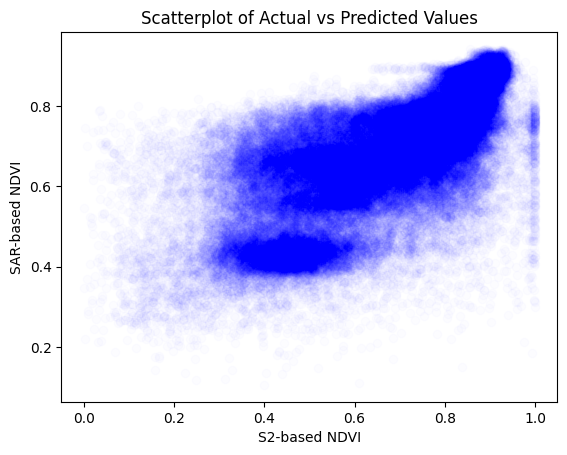

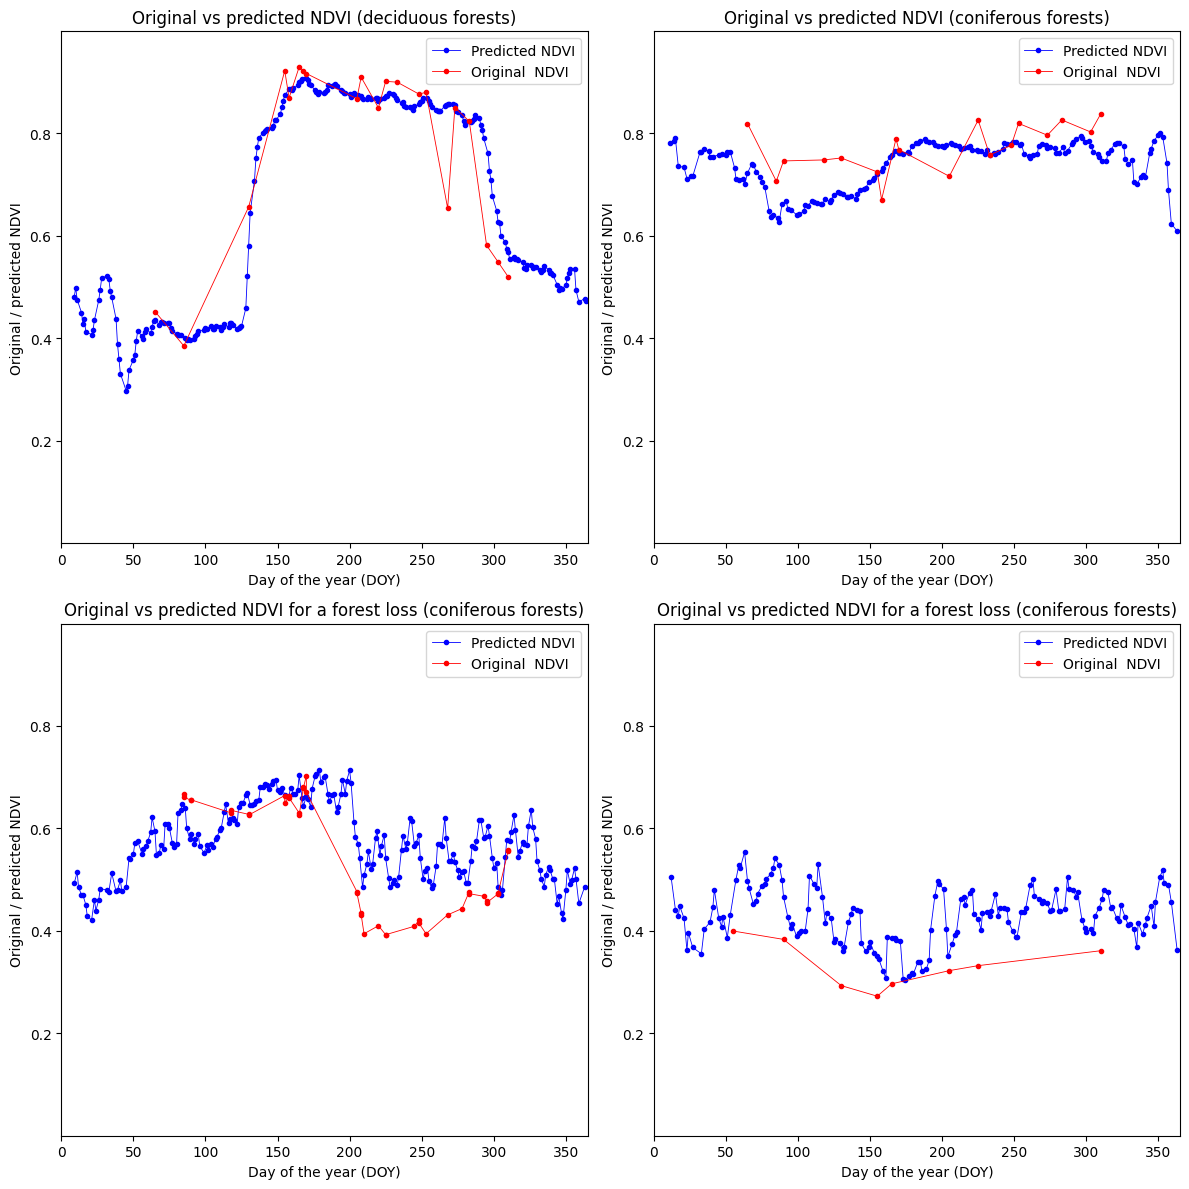

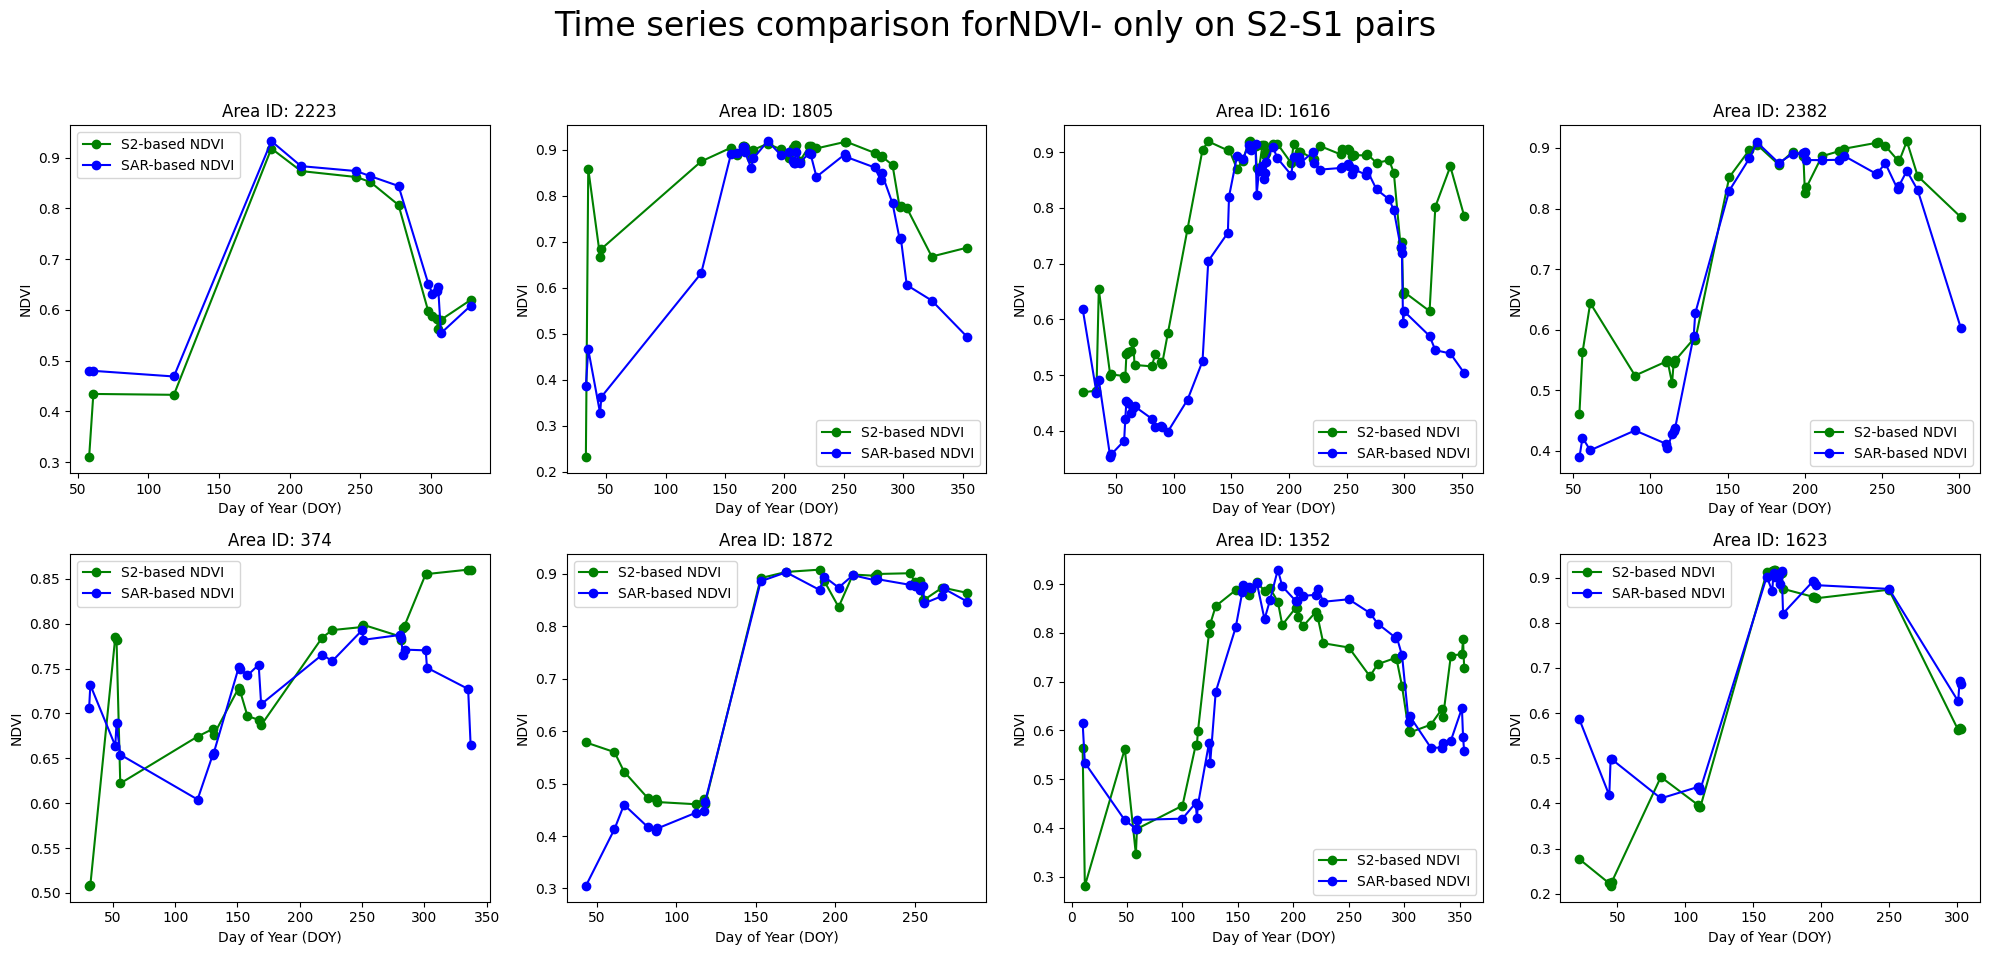

In [124]:
# Load the saved model
loaded_NDVI_model = xgb.XGBRegressor()
loaded_NDVI_model.load_model('/content/SAR-based-VIs-models/xgboost_NDVI.model')

# Predict on both the test and train sets
predictions_NDVI = loaded_NDVI_model.predict(dataNDVI[features])

# Evaluate the model and print supporting figures to explore the results
evaluation_and_figures(dataNDVI, 'NDVI', loaded_NDVI_model, predictions_NDVI)

### EVI

Error metrics for EVI
MAE: 0.06343
MSE: 0.00703
Max_error: 0.53063
R2: 0.7914
Correlation coefficient (r): 0.8903787813748236


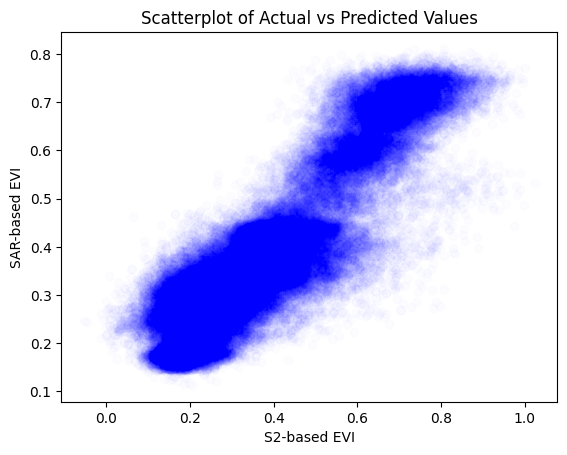

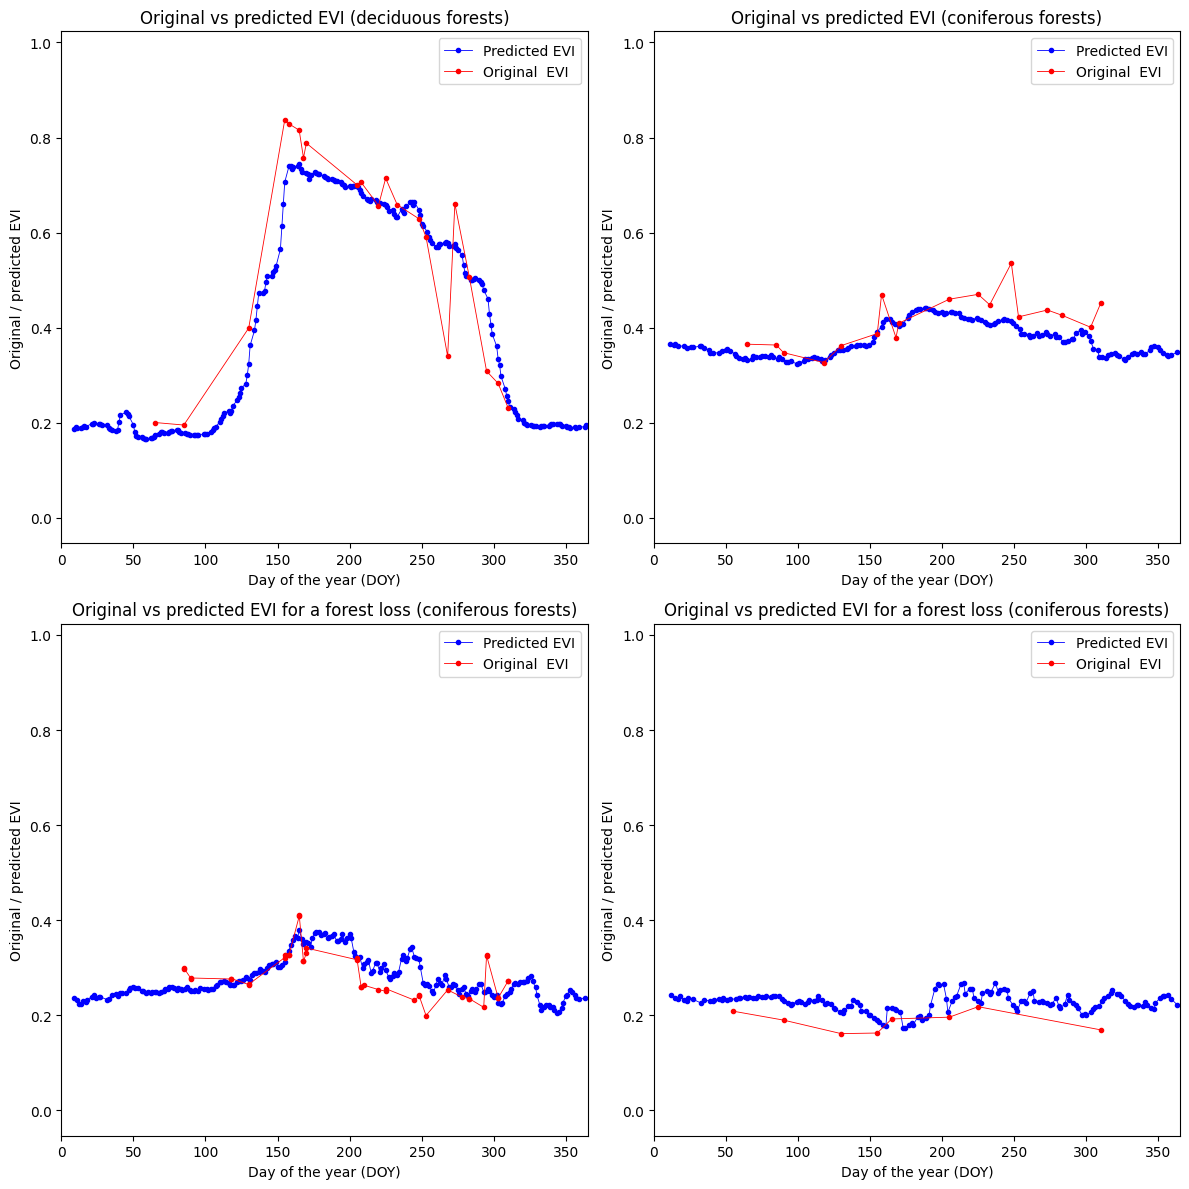

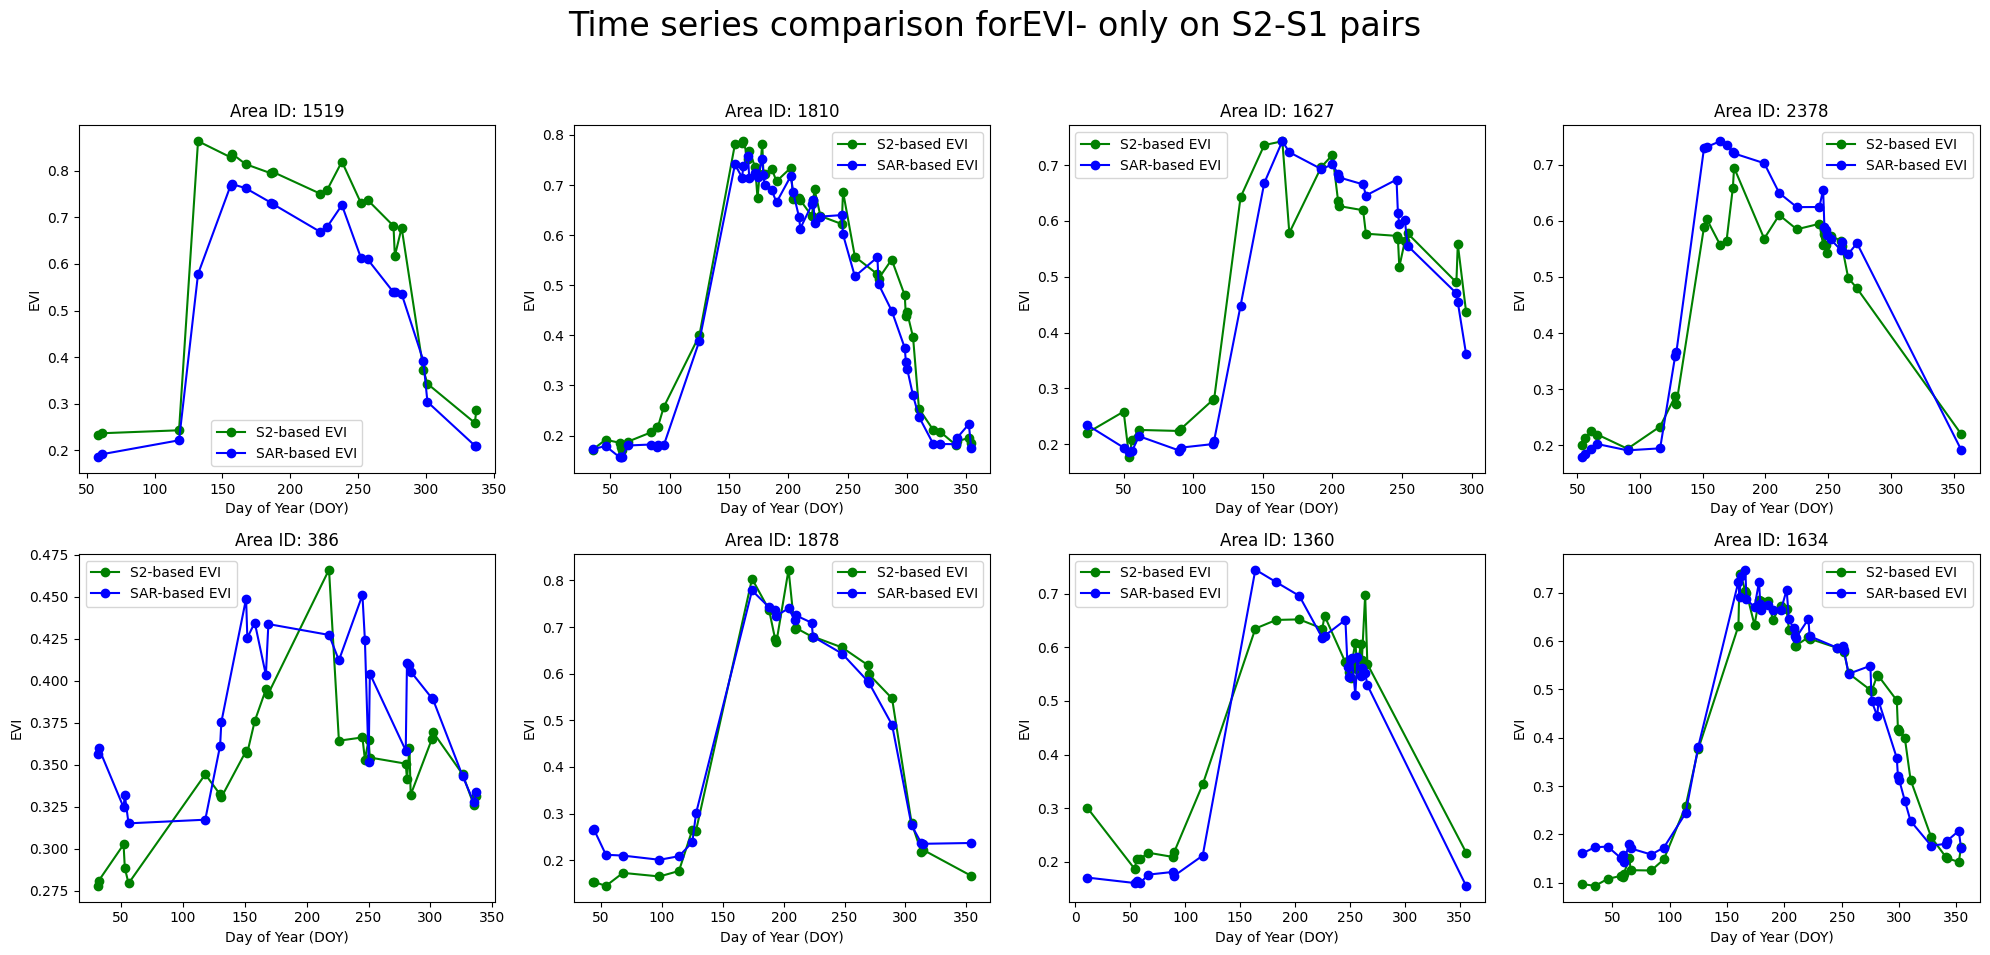

In [122]:
# Load the saved model
loaded_EVI_model = xgb.XGBRegressor()
loaded_EVI_model.load_model('/content/SAR-based-VIs-models/xgboost_EVI.model')

# Predict on both the test and train sets
predictions_EVI = loaded_EVI_model.predict(dataEVI[features])

# Evaluate the model and print supporting figures to explore the results
evaluation_and_figures(dataEVI, 'EVI', loaded_EVI_model, predictions_EVI)


## Random Forest Regressor for LAI & FAPAR

### LAI

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeRegressor from version 1.5.1 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator RandomForestRegressor from version 1.5.1 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Error metrics for LAI
MAE: 0.36190
MSE: 0.21901
Max_error: 3.00127
R2: 0.7932
Correlation coefficient (r): 0.8969589744986521


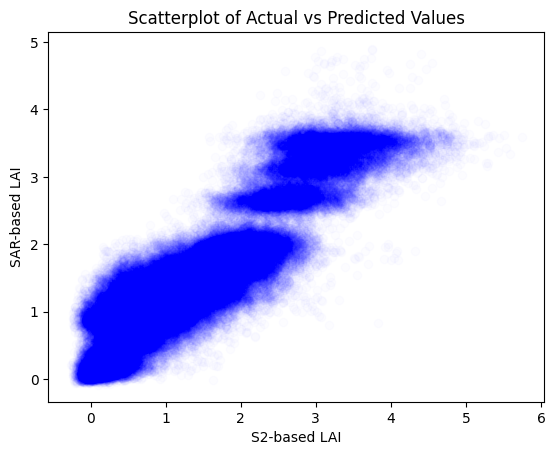

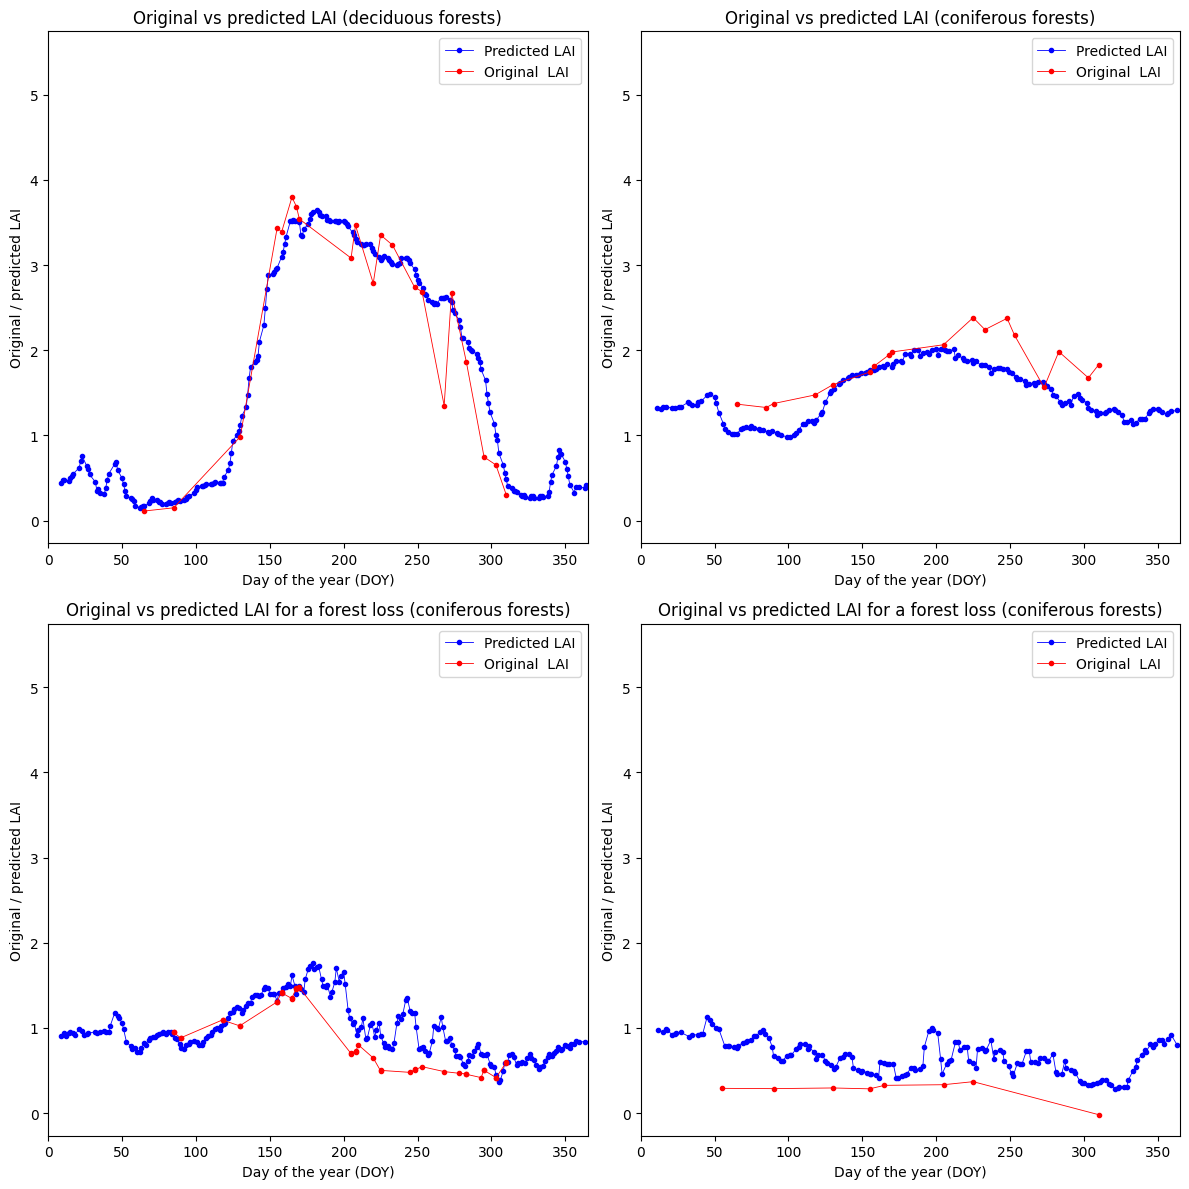

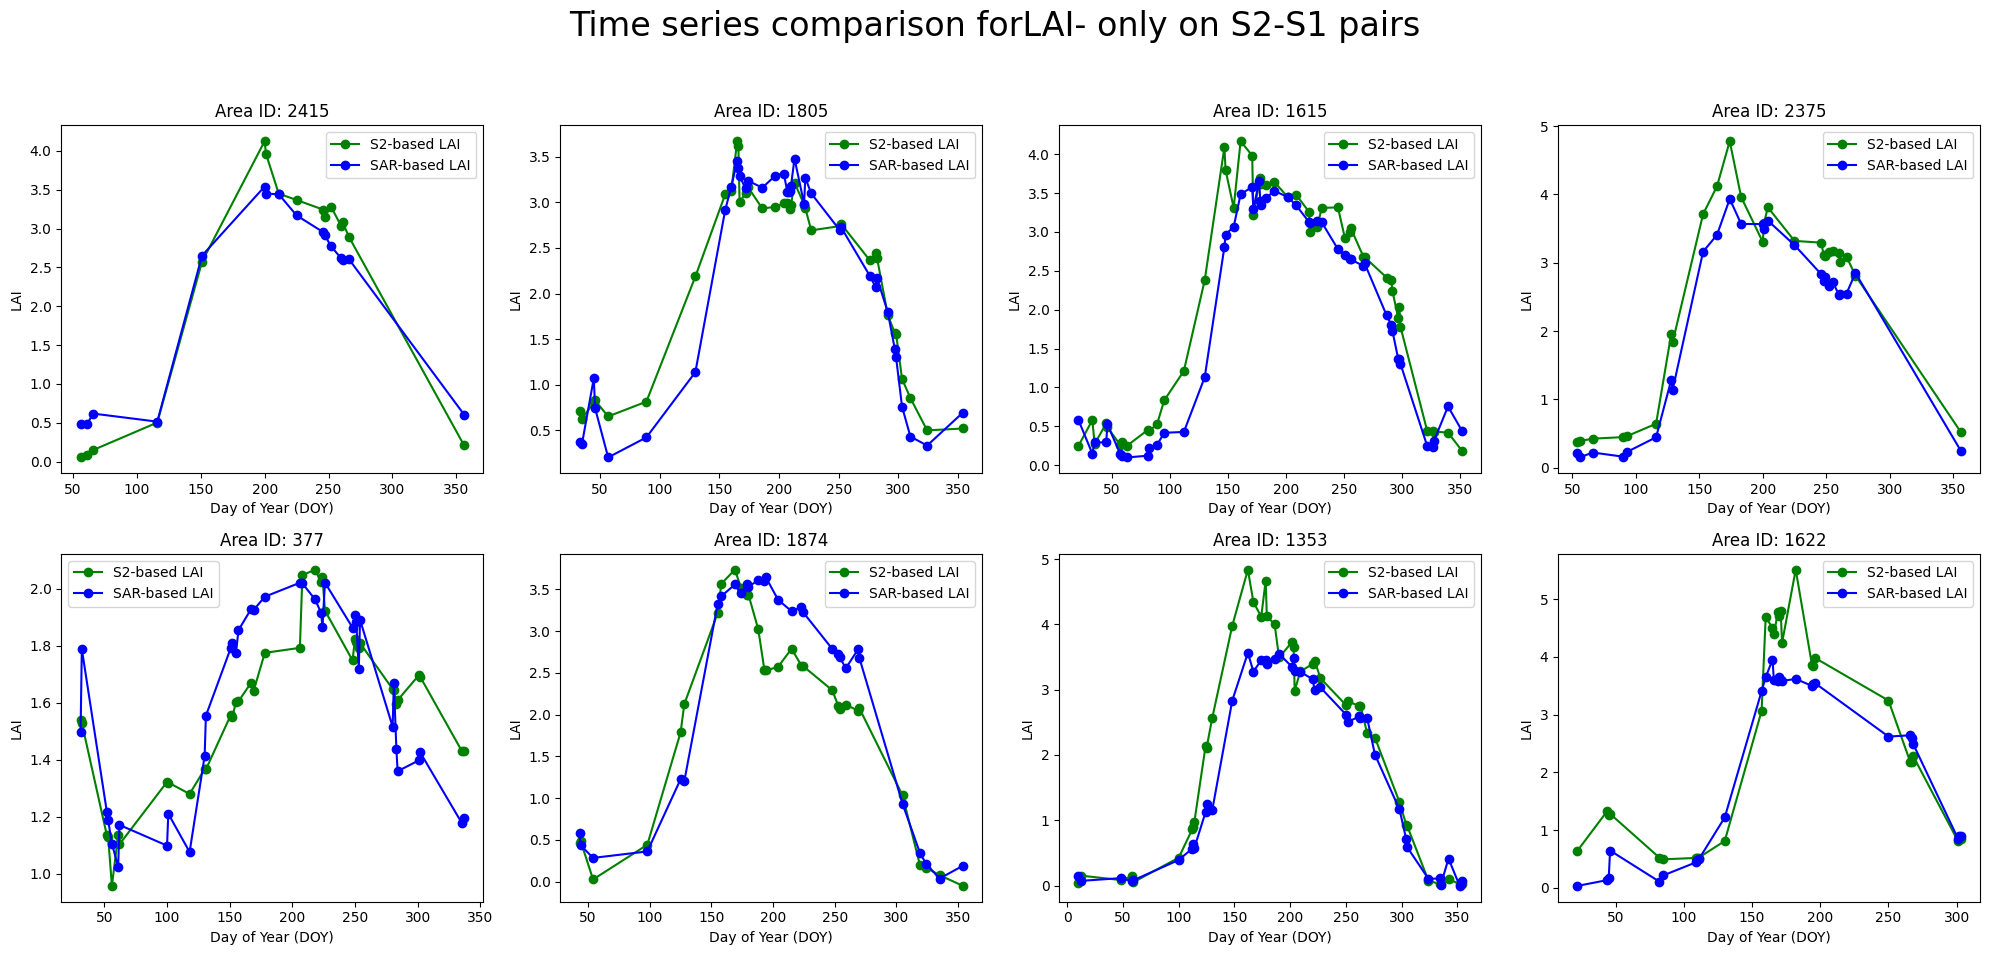

In [121]:
# Load the saved model
loaded_LAI_model = joblib.load('/content/SAR-based-VIs-models/LAI_RFR.joblib') # Replace with the actual path

# Predict on both the test and train sets
predictions_LAI = loaded_LAI_model.predict(dataLAI[features])

evaluation_and_figures(dataLAI, 'LAI', loaded_LAI_model, predictions_LAI)

### FAPAR

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeRegressor from version 1.5.1 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator RandomForestRegressor from version 1.5.1 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Error metrics for FAPAR
MAE: 0.09082
MSE: 0.01490
Max_error: 0.55205
R2: 0.6771
Correlation coefficient (r): 0.8240502367637735


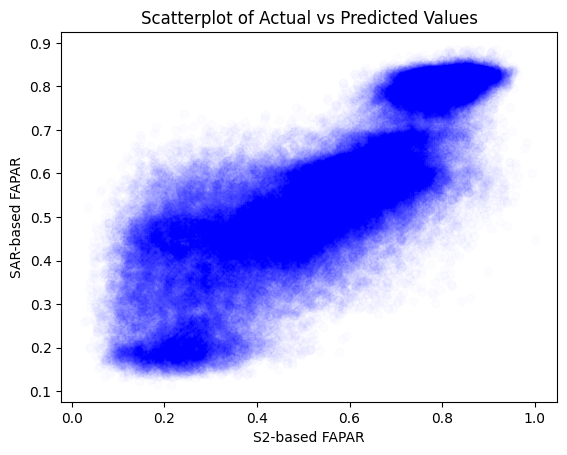

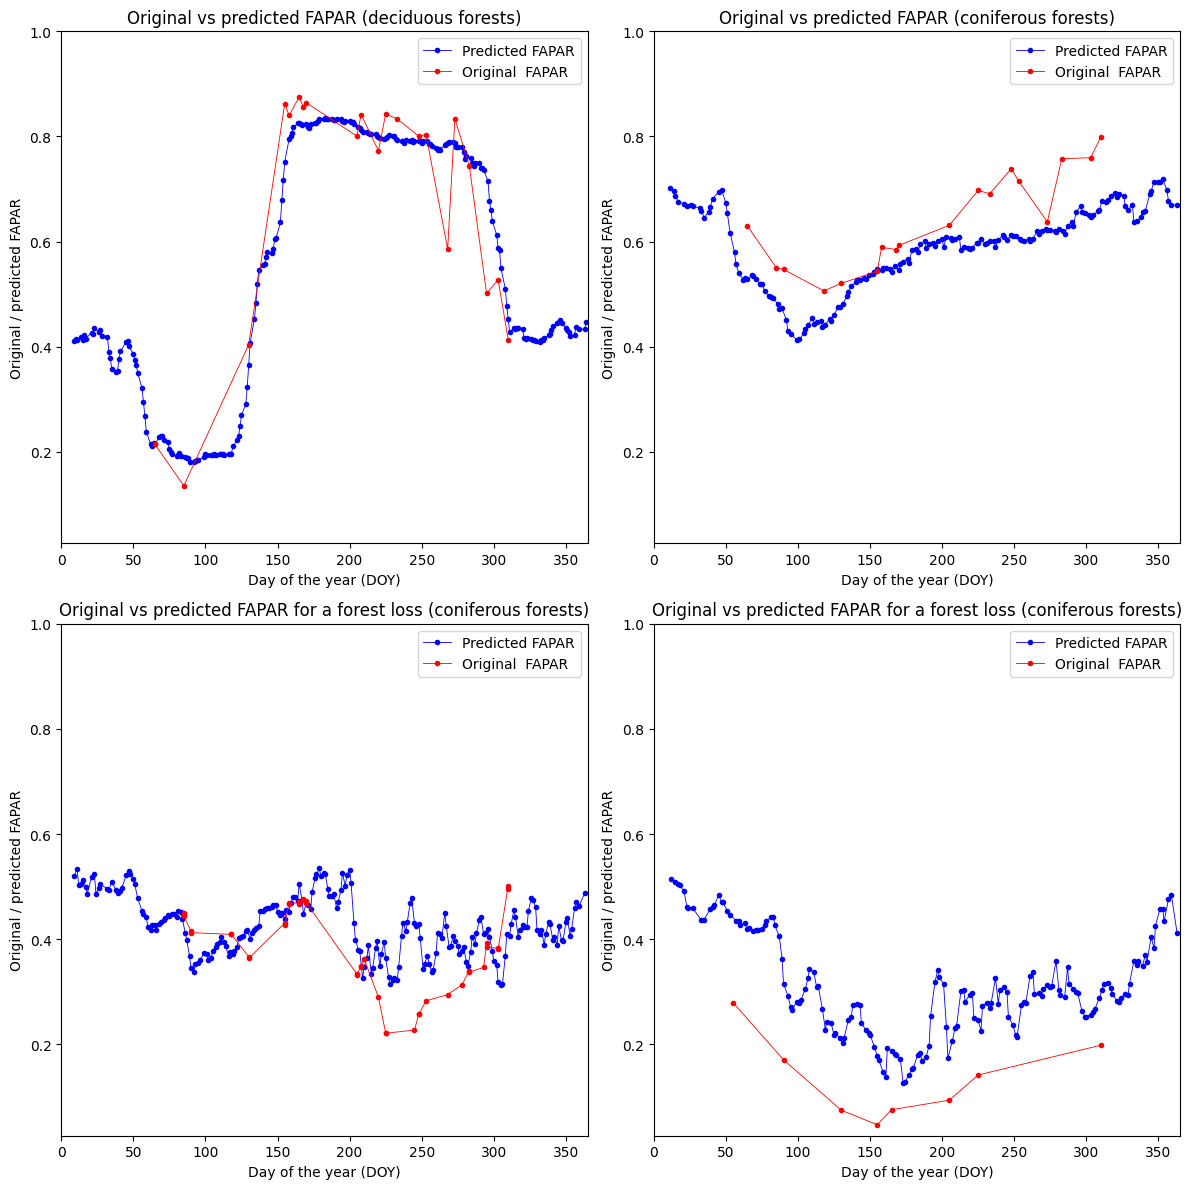

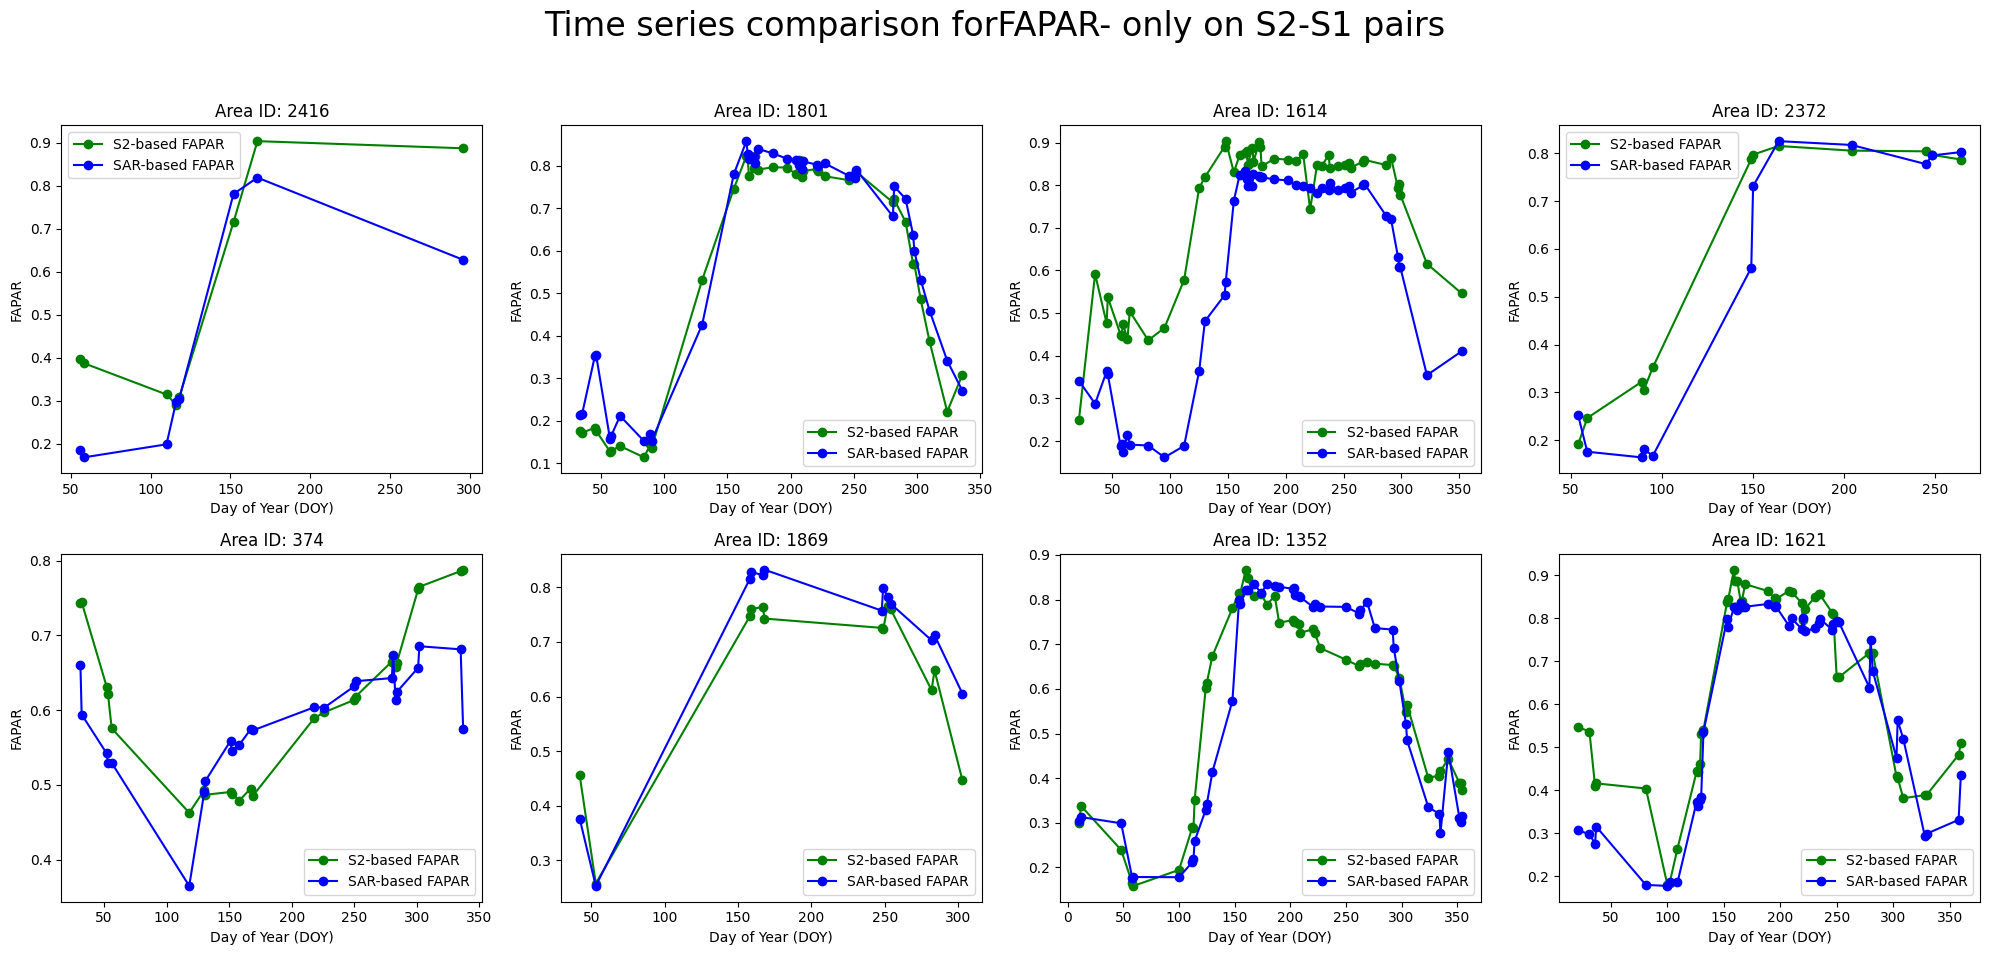

In [123]:
# Load the saved model
loaded_FAPAR_model = joblib.load('/content/SAR-based-VIs-models/FAPAR_RFR.joblib') # Replace with the actual path

# Predict on both the test and train sets
predictions_FAPAR = loaded_FAPAR_model.predict(dataFAPAR[features])

# Evaluate the model and print supporting figures to explore the results
evaluation_and_figures(dataFAPAR, 'FAPAR', loaded_FAPAR_model, predictions_FAPAR)